In [319]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [321]:
data = pd.read_csv('finall_data.csv')
data = data.drop(['contact','default'],axis=1)
columns_to_encode = ['month','poutcome']
data = pd.get_dummies(data,columns=columns_to_encode)
df = pd.DataFrame(data)
df = df.astype(int)
df.head()
data=df
data.head()
data.to_csv('clear_data.csv', index=False)

In [323]:
X = data.drop(columns=['y'])

In [325]:
y = data['y']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
def plot_metrics(history, title="Model Performance"):
  plt.figure(figsize=(12, 8))  # Adjust figure size for multiple plots

  # Loss plot
  plt.subplot(2, 2, 1)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'{title} - Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Accuracy plot
  plt.subplot(2, 2, 2)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title(f'{title} - Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  # Precision plot
  plt.subplot(2, 2, 3)
  plt.plot(history.history['precision'], label='Train Precision')
  plt.plot(history.history['val_precision'], label='Validation Precision')
  plt.title(f'{title} - Precision')
  plt.xlabel('Epochs')
  plt.ylabel('Precision')
  plt.legend()

  # Tight layout for better spacing
  plt.tight_layout()
  plt.show()

In [331]:
def experiment_1():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy','precision'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50, batch_size=32, verbose=1)

    plot_metrics(history, title="Experiment 1: Basic MLP")
    return model

In [391]:
def experiment_2():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.008),
                  loss='binary_crossentropy',
                  metrics=['accuracy','precision'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=100, batch_size=64, verbose=1)

    plot_metrics(history, title="Experiment 2: Deeper MLP")
    return model


In [413]:
def experiment_3():
    model = Sequential([
        Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
        Dense(16, activation='tanh'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy','precision'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50, batch_size=64, verbose=1)

    plot_metrics(history, title="Experiment 3: Adjusted Activations and Batch Size")
    return model

Running Experiment 1
Epoch 1/50


C:\Users\amin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6996 - loss: 20.5858 - precision: 0.1047 - val_accuracy: 0.8608 - val_loss: 3.4076 - val_precision: 0.3158
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 2.5501 - precision: 0.2883 - val_accuracy: 0.8354 - val_loss: 0.8830 - val_precision: 0.2703
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.8870 - precision: 0.3056 - val_accuracy: 0.8652 - val_loss: 0.6676 - val_precision: 0.3286
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.7779 - precision: 0.3023 - val_accuracy: 0.8564 - val_loss: 0.6032 - val_precision: 0.3667
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.7376 - precision: 0.3887 - val_accuracy: 0.8718 - val_loss: 0.4455 - val_precision: 0.3977
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.6326 - precision: 0.4143 - val_accuracy: 0.8497 - val_loss: 0.6148 - 

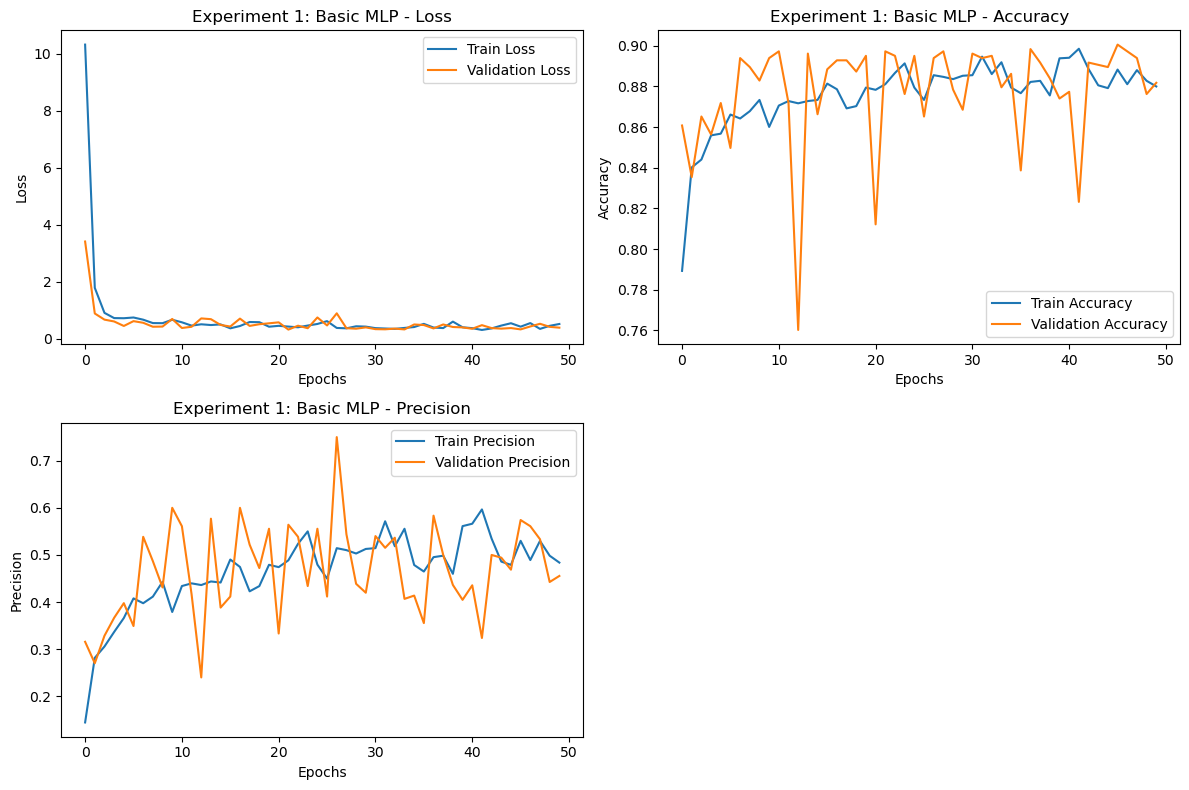

In [345]:

print("Running Experiment 1")
model_1 = experiment_1()


Running Experiment 2
Epoch 1/100


C:\Users\amin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7792 - loss: 5.2870 - precision: 0.1614 - val_accuracy: 0.8939 - val_loss: 0.4026 - val_precision: 0.5714
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.4318 - precision: 0.2950 - val_accuracy: 0.8917 - val_loss: 0.3694 - val_precision: 0.0000e+00
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3991 - precision: 0.3348 - val_accuracy: 0.8917 - val_loss: 0.3356 - val_precision: 0.5000
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8808 - loss: 0.3590 - precision: 0.4503 - val_accuracy: 0.8895 - val_loss: 0.2963 - val_precision: 0.3333
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8852 - loss: 0.3041 - precision: 0.4109 - val_accuracy: 0.8950 - val_loss: 0.2792 - val_precision: 0.5652
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8823 - loss: 0.3004 - precision: 0.4290 - val_accuracy: 0.8906 - val_loss: 0.3574 - val

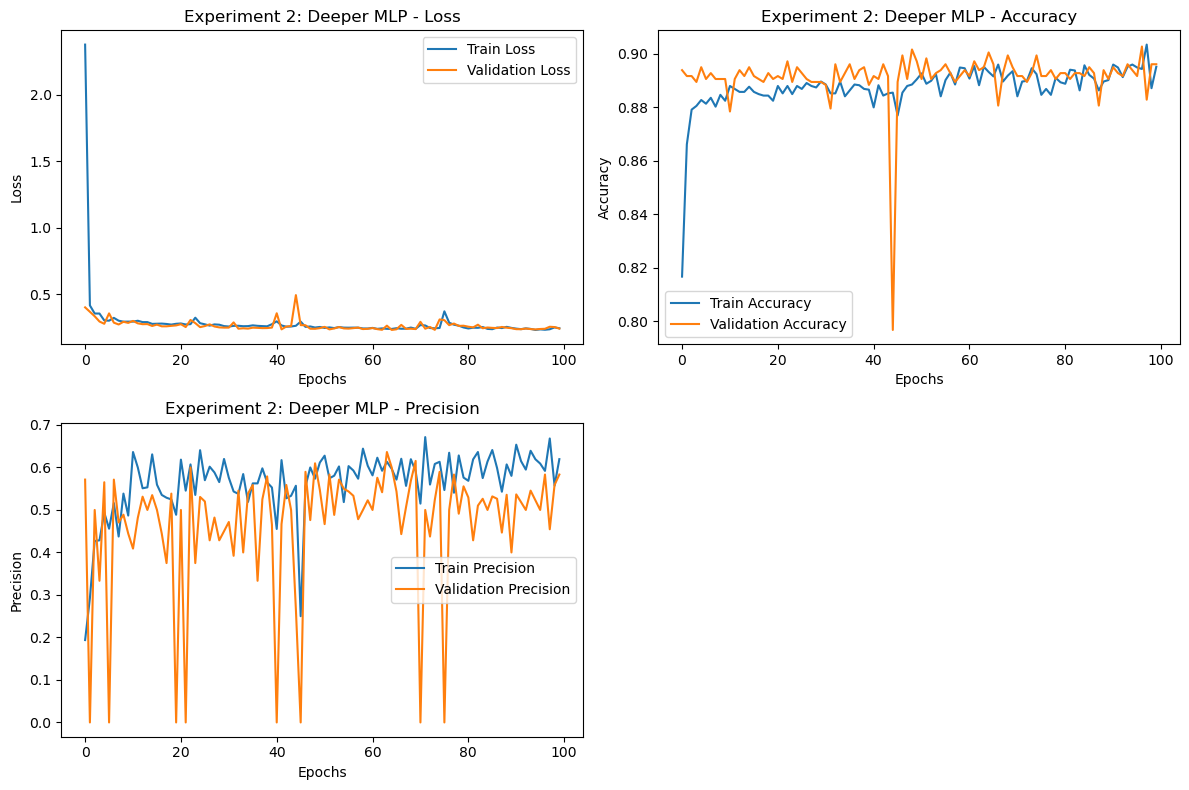

In [393]:

print("Running Experiment 2")
model_2 = experiment_2()

In [132]:
X_train.shape[1]

46

Running Experiment 3
Epoch 1/50


C:\Users\amin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7454 - loss: 0.5447 - precision: 0.1014 - val_accuracy: 0.8917 - val_loss: 0.3462 - val_precision: 0.0000e+00
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8805 - loss: 0.3551 - precision: 0.0000e+00 - val_accuracy: 0.8917 - val_loss: 0.3247 - val_precision: 0.0000e+00
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.3387 - precision: 0.0000e+00 - val_accuracy: 0.8917 - val_loss: 0.3169 - val_precision: 0.0000e+00
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3276 - precision: 0.0000e+00 - val_accuracy: 0.8917 - val_loss: 0.3178 - val_precision: 0.0000e+00
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3195 - precision: 0.2914 - val_accuracy: 0.8917 - val_loss: 0.3043 - val_precision: 0.0000e+00
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.3118 - precision: 0.6364 - val_accuracy: 0.8950 - 

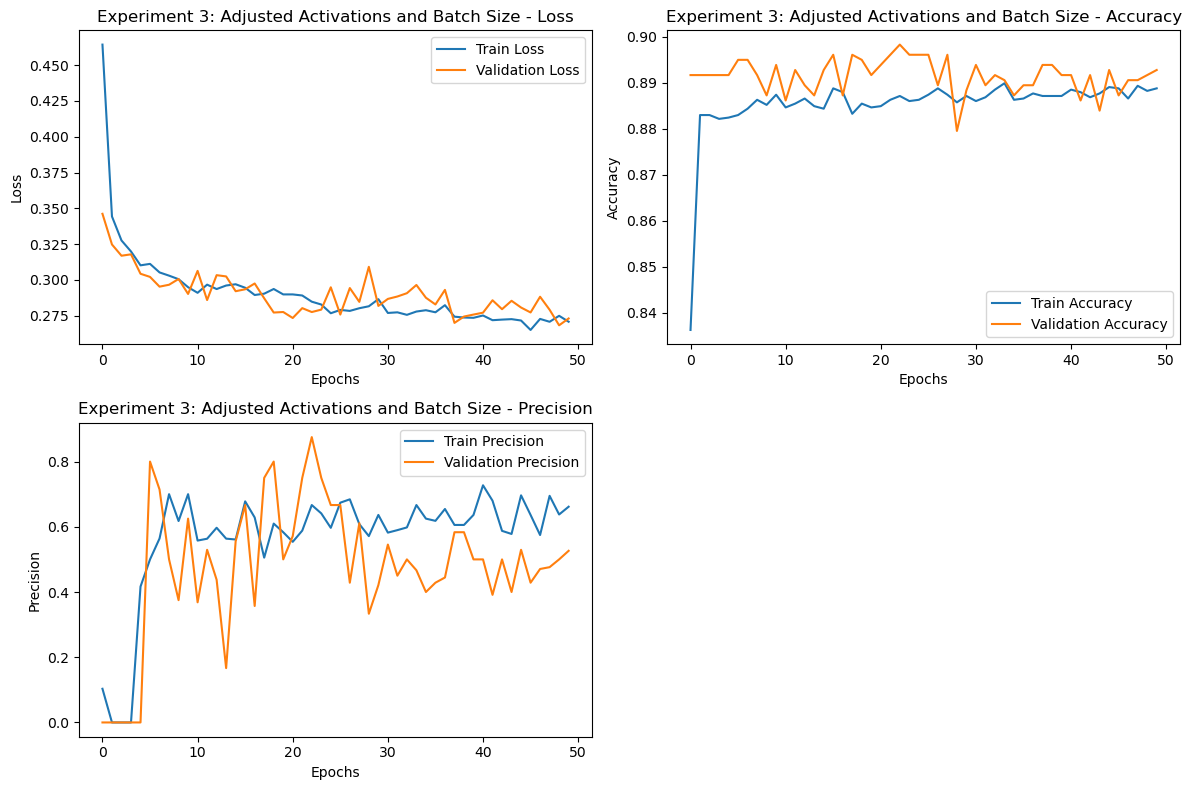

In [415]:

print("Running Experiment 3")
model_3 = experiment_3()
